In [1]:
##Lesson 3
#read FITS
# put data in Pandas
# plot

In [2]:
from astropy.table import Table

In [3]:
filename = 'gd1_results.fits'
results=Table.read(filename)

In [4]:
results.info

<Table length=140340>
      name       dtype    unit                              description                            
--------------- ------- -------- ------------------------------------------------------------------
      source_id   int64          Unique source identifier (unique within a particular Data Release)
             ra float64      deg                                                    Right ascension
            dec float64      deg                                                        Declination
           pmra float64 mas / yr                         Proper motion in right ascension direction
          pmdec float64 mas / yr                             Proper motion in declination direction
       parallax float64      mas                                                           Parallax
 parallax_error float64      mas                                         Standard error of parallax
radial_velocity float64   km / s                                              

In [5]:
results['ra']  #how to select a column

142.48301935991023
142.25452941346344
142.64528557468074
142.57739430926034
142.58913564478618
141.81762228999614
143.18339801317677
142.9347319464589
142.26769745823267
142.89551292869012
142.2780935768316


In [6]:
type(results['ra'])

astropy.table.column.Column

In [7]:
results[0]


source_id,ra,dec,pmra,pmdec,parallax,parallax_error,radial_velocity
,deg,deg,mas / yr,mas / yr,mas,mas,km / s
int64,float64,float64,float64,float64,float64,float64,float64
637987125186749568,142.48301935991023,21.75771616932985,-2.5168384683875766,2.941813096629439,-0.2573448962333354,0.823720794509811,1e+20


In [8]:
results['ra'][9]


142.89551292869012

In [9]:
results[9]['ra']

142.89551292869012

In [10]:
from matplotlib import pyplot as plt

In [12]:
%matplotlib inline   

In [13]:
#note: could use scatter instead of plot.  

Text(0, 0.5, 'dec (deg ICRS)')

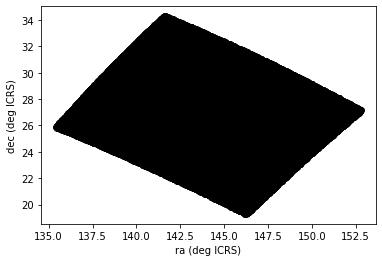

In [14]:
ra=results['ra']
dec=results['dec']

plt.plot(ra,dec, 'ko')
plt.xlabel('ra (deg ICRS)')
plt.ylabel('dec (deg ICRS)')


Text(0, 0.5, 'dec (deg ICRS)')

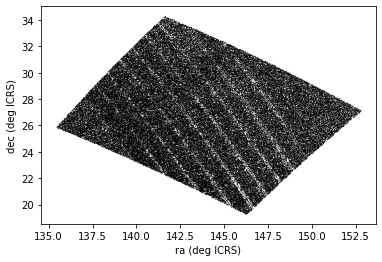

In [15]:

plt.plot(ra,dec, 'ko', markersize=0.1)
plt.xlabel('ra (deg ICRS)')
plt.ylabel('dec (deg ICRS)')

Text(0, 0.5, 'dec (deg ICRS)')

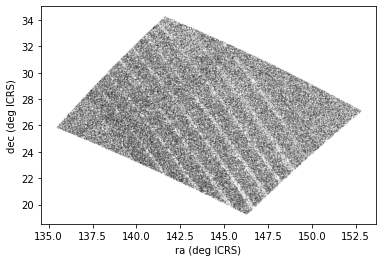

In [17]:

plt.plot(ra,dec, 'ko', markersize=0.3, alpha=0.1)
plt.xlabel('ra (deg ICRS)')
plt.ylabel('dec (deg ICRS)')

In [18]:
from pyia import GaiaData

In [19]:
gaia_data = GaiaData(results)
type(gaia_data)

pyia.data.GaiaData

In [20]:
import astropy.units as u

In [21]:
sky_coord = gaia_data.get_skycoord(distance=8*u.kpc,radial_velocity=0*u.km/u.s)

In [22]:
# we use the known distance of GD1 because so far away the parallax distances aren't good, dummy radial velocity

In [23]:
import gala.coordinates as gc


In [24]:
transformed= sky_coord.transform_to(gc.GD1Koposov10)

In [25]:
gd1_coord = gc.reflex_correct(transformed)
type(gd1_coord)

astropy.coordinates.sky_coordinate.SkyCoord

In [26]:
gd1_coord

<SkyCoord (GD1Koposov10): (phi1, phi2, distance) in (deg, deg, kpc)
    [(-54.97562251, -3.65934904, 8.), (-54.49824711, -3.08152389, 8.),
     (-54.55163387, -3.55422922, 8.), ..., (-54.94894646, -4.69129505, 8.),
     (-54.87334917, -4.95108083, 8.), (-54.6083886 , -4.85901399, 8.)]
 (pm_phi1_cosphi2, pm_phi2, radial_velocity) in (mas / yr, mas / yr, km / s)
    [( 6.42994451,   6.51815743, -85.89847175),
     (-3.16863659,  -6.20679458, -83.12100702),
     ( 9.1294466 , -16.81956952, -84.18853236), ...,
     (-5.75262125,  17.89093031, -87.6914386 ),
     (-8.78623147,   1.25154922, -87.89277153),
     ( 3.69437506,   8.71911075, -86.78009662)]>

In [27]:
gd1_coord.phi1


<Longitude [-54.97562251, -54.49824711, -54.55163387, ..., -54.94894646,
            -54.87334917, -54.6083886 ] deg>

Text(0, 0.5, 'phi2 (deg GD2)')

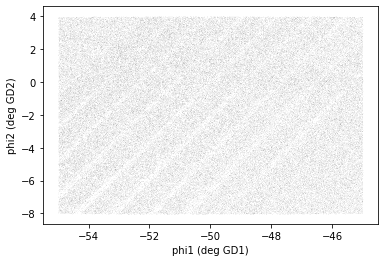

In [29]:
phi1=gd1_coord.phi1
phi2=gd1_coord.phi2

plt.plot(phi1,phi2,'ko',markersize=0.1,alpha=0.1)
plt.xlabel('phi1 (deg GD1)')
plt.ylabel('phi2 (deg GD2)')